In [3]:
%cd drive/MyDrive/Casualty/

/content/drive/MyDrive/Casualty


In [ ]:
!apt-get install -y graphviz-dev

In [5]:
!pip install pygraphviz

  Created wheel for pygraphviz: filename=pygraphviz-1.7-cp37-cp37m-linux_x86_64.whl size=165740 sha256=72993986ea6d6c14de96c3d435101d33bfd61cb7419d91a35b342ede24f59e34
  Stored in directory: /root/.cache/pip/wheels/8c/bc/0c/ac35392b72556e75107ff610cb31b313e8471918a6d280e34c
Successfully built pygraphviz


In [ ]:
!pip install causalnex

In [7]:
!pip install dvc


In [ ]:
# !pip install 'dvc[gdrive]'
# !dvc pull

In [10]:
import sys
import os
from json import dump, load
import numpy as np
import pandas as pd
sys.path.append(os.path.abspath(os.path.join('../')))
from scripts.loading_data import *
from scripts.visualize import *
from scripts.graph import *
from scripts.feature_engineering import encode
import seaborn as sn




In [11]:
# Loading cleaned data
data = load_csv("data/data.csv")

In [12]:
data = data.drop(columns=["Unnamed: 0"])

In [ ]:
cg_diag_dropped = 

/usr/local/lib/python3.7/dist-packages/pygraphviz/agraph.py:1390: RuntimeWarning: Warning: node 'radius_mean', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/pygraphviz/agraph.py:1390: RuntimeWarning: Warning: node 'radius_mean', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


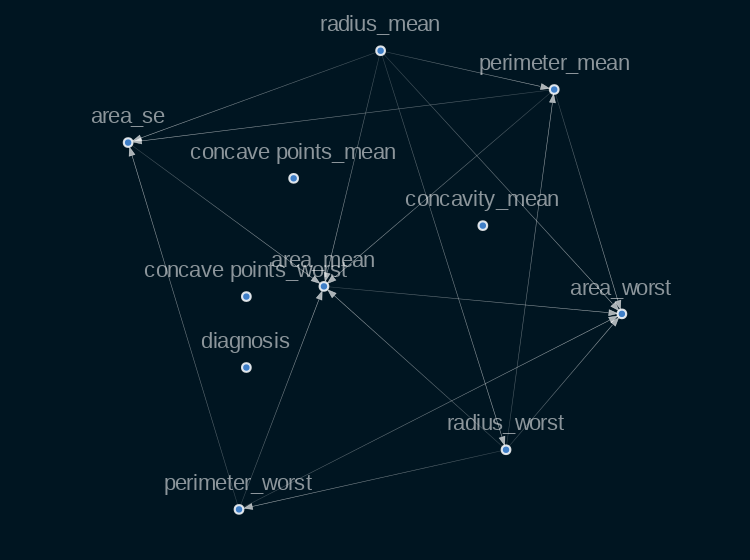

In [16]:
cg_diag_dropped.plot_graph()

In [31]:
from causalnex.structure.notears import from_pandas_lasso
sm_with_tabu_edges = from_pandas_lasso(data,tabu_parent_nodes=["diagnosis"],tabu_edges=[("perimeter_mean", "area_worst"),("perimeter_mean", "area_se"),("perimeter_worst", "area_se"),("perimeter_mean", "area_mean"),("radius_mean", "radius_worst")],w_threshold = 0.8,beta = 0.8)


/usr/local/lib/python3.7/dist-packages/pygraphviz/agraph.py:1390: RuntimeWarning: Warning: node 'radius_mean', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


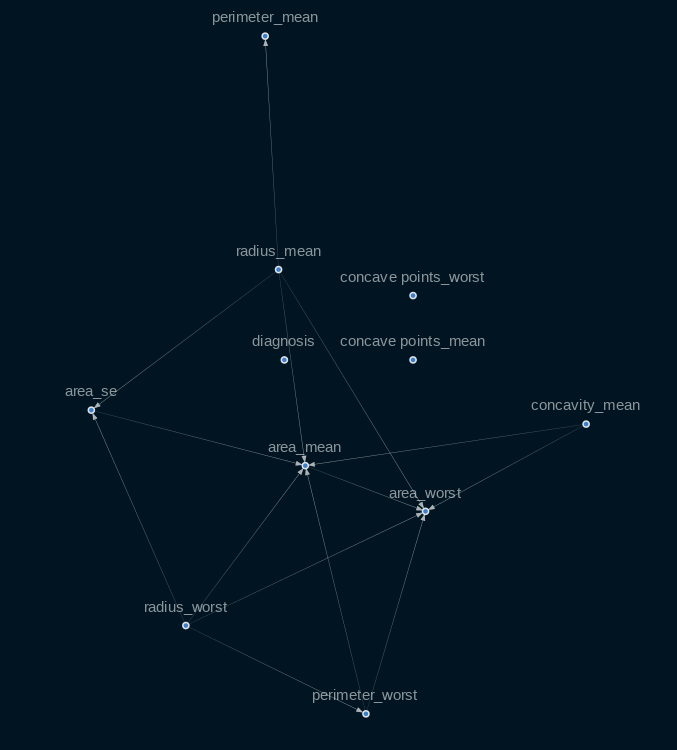

In [32]:
from IPython.display import Image
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE

viz = plot_structure(
    sm_with_tabu_edges,
    graph_attributes={"scale": 2.0, 'size':2.5},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))


### Adding constraints to our graph

In [47]:
sm_with_tabu_edges = from_pandas_lasso(graph_data_100, tabu_child_nodes=["radius_mean"],tabu_parent_nodes=["diagnosis"],tabu_edges=[("perimeter_mean", "area_se"),("perimeter_worst", "area_se"),("perimeter_worst", "area_worst"),("perimeter_worst", "area_mean"),("perimeter_mean", "area_mean"),("radius_mean", "radius_worst"),("area_se","area_mean")],w_threshold = 0.8,beta = 0.8)

/usr/local/lib/python3.7/dist-packages/pygraphviz/agraph.py:1390: RuntimeWarning: Warning: node 'radius_mean', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


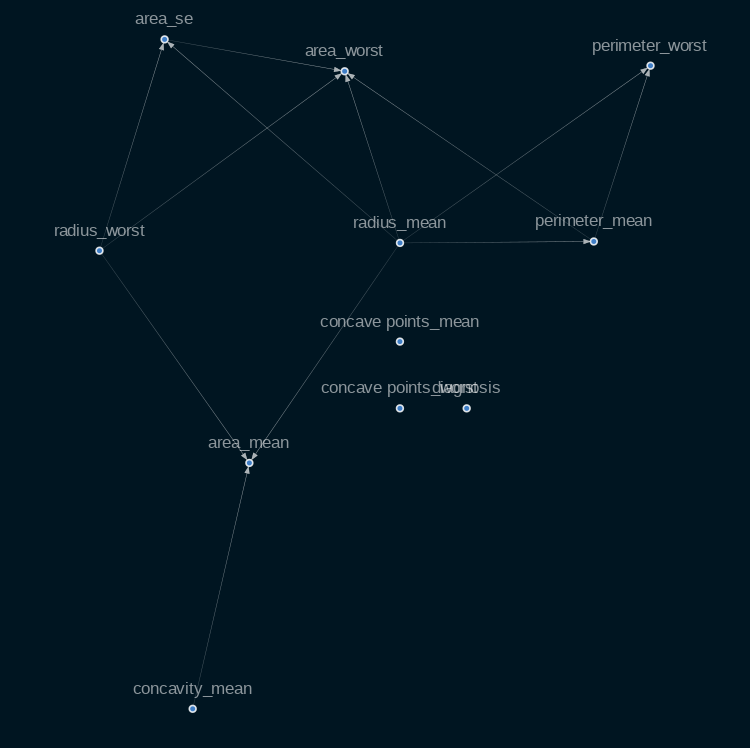

In [48]:
from IPython.display import Image
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE

viz = plot_structure(
    sm_with_tabu_edges,
    graph_attributes={"scale": 2.0, 'size':2.5},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

### Adding more constraints

In [38]:
sm_with_tabu_edges = from_pandas_lasso(graph_data_100, tabu_child_nodes=["radius_mean"],tabu_parent_nodes=["diagnosis"],tabu_edges=[("perimeter_mean", "area_worst"),("perimeter_mean", "area_se"),("perimeter_worst", "area_se"),("perimeter_worst", "area_worst"),("perimeter_worst", "area_mean"),("perimeter_mean", "area_mean"),("radius_worst", "area_se"),("radius_mean", "radius_worst"),("area_se","area_mean"),("perimeter_mean","perimeter_worst"),("area_se","area_worst")],w_threshold = 0.8,beta = 0.8)

/usr/local/lib/python3.7/dist-packages/pygraphviz/agraph.py:1390: RuntimeWarning: Warning: node 'radius_mean', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


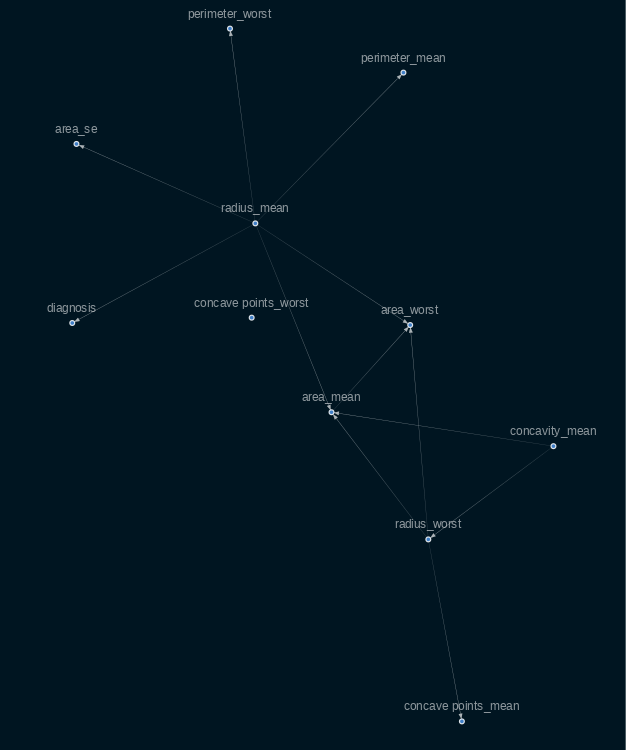

In [39]:
viz = plot_structure(
    sm_with_tabu_edges,
    graph_attributes={"scale": 2.0, 'size':2.5},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

In [ ]:
## Testing for stability

In [49]:
graph_data_100 = data.loc[:200,:]
graph_data_250 = data.loc[:250,:]
graph_data_350 = data.loc[:350,:]
graph_data_all = data

In [50]:
graph1 = from_pandas_lasso(graph_data_100, tabu_child_nodes=["radius_mean"],tabu_parent_nodes=["diagnosis"],tabu_edges=[("perimeter_mean", "area_se"),("perimeter_worst", "area_se"),("perimeter_worst", "area_worst"),("perimeter_worst", "area_mean"),("perimeter_mean", "area_mean"),("radius_mean", "radius_worst"),("area_se","area_mean")],w_threshold = 0.8,beta = 0.8)
# graph1.remove_weak_edges()

graph2 = from_pandas_lasso(graph_data_350, tabu_child_nodes=["radius_mean"],tabu_parent_nodes=["diagnosis"],tabu_edges=[("perimeter_mean", "area_se"),("perimeter_worst", "area_se"),("perimeter_worst", "area_worst"),("perimeter_worst", "area_mean"),("perimeter_mean", "area_mean"),("radius_mean", "radius_worst"),("area_se","area_mean")],w_threshold = 0.8,beta = 0.8)
# graph2.remove_weak_edges()

graph3 = from_pandas_lasso(graph_data_all, tabu_child_nodes=["radius_mean"],tabu_parent_nodes=["diagnosis"],tabu_edges=[("perimeter_mean", "area_se"),("perimeter_worst", "area_se"),("perimeter_worst", "area_worst"),("perimeter_worst", "area_mean"),("perimeter_mean", "area_mean"),("radius_mean", "radius_worst"),("area_se","area_mean")],w_threshold = 0.8,beta = 0.8)
# graph3.remove_weak_edges()

In [51]:
similarity_graph1_graph2 = jaccard_similarity(graph1.edges(), graph2.edges())
similarity_graph2_graph3 = jaccard_similarity(graph2.edges(), graph3.edges())
# similarity_graph3_graph4 = jaccard_similarity(graph3.edges(), graph4.edges())

In [52]:
similarity_graph1_graph2,similarity_graph2_graph3

(0.714, 0.6)